# GENDER RECOGNIZATION BY THE NAIVE_BAYES,LINEAR_REGRESSION & LOGISTIC_REGRESSION & RANDOM_FOREST

In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
import pickle

   READING THE CSV FILE

In [61]:
data = pd.read_csv("C:/Users/91939/Downloads/gender_classification_v7.csv")
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [63]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [64]:
data.shape

(5001, 8)

In [65]:
data.groupby(['gender']).count()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
gender,,,,,,,
Female,2501,2501,2501,2501,2501,2501,2501
Male,2500,2500,2500,2500,2500,2500,2500


In [66]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [67]:
data['gender'] = data['gender'].replace({"Male":1,"Female":0})
data.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
5,1,13.0,6.8,1,1,1,1,1
6,1,15.3,6.2,1,1,1,0,1
7,0,13.0,5.2,0,0,0,0,0
8,1,11.9,5.4,1,0,1,1,0
9,1,12.1,5.4,0,0,0,0,0


In [68]:
cor_mat=data.corr()
cor_mat

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794,-0.010767
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328,0.334125
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292,0.277190
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303,0.758502
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794,0.744147
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312,0.743319
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000,0.754850
gender,-0.010767,0.334125,0.277190,0.758502,0.744147,0.743319,0.754850,1.000000


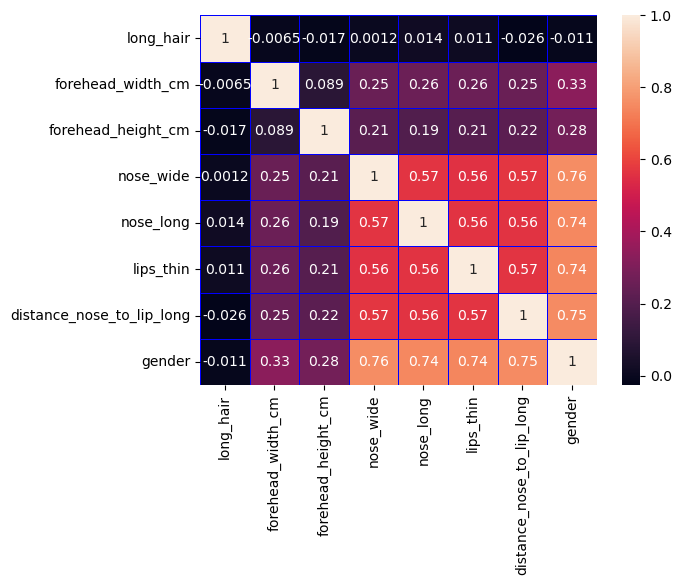

In [69]:

sns.heatmap(data.corr(), annot = True, linewidths = 0.5, linecolor = "blue")
plt.show()

gender
0    2501
1    2500
Name: count, dtype: int64

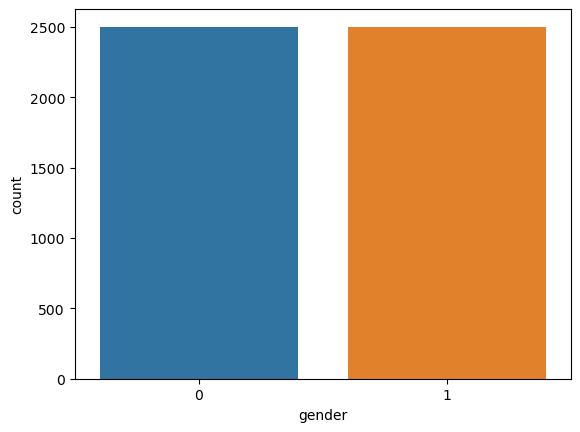

In [70]:
# The number of gender in the dataset and its graphic.
sns.countplot(x = "gender", data = data)
data.loc[:,"gender"].value_counts()

In [71]:
x= data.drop("gender",axis=1)
y = data['gender']
x

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [72]:
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=1)
x_test.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
2764,1,12.8,6.3,0,0,1,0
4767,1,12.3,5.8,1,1,1,1
3814,1,11.5,5.4,0,0,0,0
3499,1,12.3,6.2,0,0,1,1
2735,1,12.2,5.6,0,0,0,0


In [74]:
y_test.head()

2764    0
4767    1
3814    0
3499    0
2735    0
Name: gender, dtype: int64

In [75]:
print("x_test shape:",x_test.shape)

x_test shape: (1501, 7)


In [76]:
print("y_test shape:",y_test.shape)

y_test shape: (1501,)


In [77]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)



GaussianNB()

In [78]:
ypred=gnb.predict(x_test)
print(ypred)

[0 1 0 ... 1 0 1]


In [79]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.885403572316324

In [80]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ypred,y_test)


0.028647568287808126

In [81]:
Results=pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=ypred
Results=Results.reset_index()
Results['ID']=Results.index
Results.head(50)

,index,Actual,Predicted,ID
0,2764,0,0,0
1,4767,1,1,1
2,3814,0,0,2
3,3499,0,0,3
4,2735,0,0,4
5,3922,1,1,5
6,2701,1,1,6
7,1179,0,0,7
8,932,1,1,8
9,792,1,1,9


In [82]:
import pickle
filename='nbmodel.pkl'
pickle.dump(gnb,open(filename,'wb'))

In [83]:
pickled_model=pickle.load(open('nbmodel.pkl','rb'))

In [84]:
#from sklearn.ensemble import RandomForestRegressor
#reg=RandomForestRegressor(random_state=42)
#reg.fit(x_train,y_train)

In [85]:
#ypred=reg.predict(x_test)
#print(ypred)

In [86]:
#from sklearn.metrics import r2_score
#r2_score(y_test,ypred)

In [87]:
#Results=pd.DataFrame(columns=['Actual','Predicted'])
#Results['Actual']=y_test
#Results['Predicted']=ypred
#Results=Results.reset_index()
#Results['ID']=Results.index
#Results.head(50)